Uunduh dataset "face-mask-detection" dari Kaggle menggunakan kagglehub, lalu disimpan pada lokasi penyimpanan ke variabel path.

In [32]:
import kagglehub
import os

# Download dataset
path = kagglehub.dataset_download("andrewmvd/face-mask-detection")

Instal library ultralytics, yang berisi implementasi YOLO (You Only Look Once) versi terbaru, secara otomatis dan tanpa menampilkan banyak output (-q = quiet).

In [29]:
# 1. Install depedencies
!pip install ultralytics --upgrade -q

Import library yang akan digunakan

In [30]:
# 2. Import library
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Bagian ini berfungsi untuk memuat model YOLOv8 versi segmentasi yang sudah dilatih sebelumnya, yaitu YOLOv8s-seg, agar siap digunakan untuk tugas segmentasi objek pada gambar.

In [31]:
# 3. Load model YOLOv8-seg pretrained
model = YOLO("yolov8s-seg.pt")

100%|██████████| 22.8M/22.8M [00:00<00:00, 398MB/s]


Bagian ini digunakan untuk memuat gambar dari dataset ke dalam program. Gambar dibaca menggunakan OpenCV, lalu warnanya diubah dari format BGR (default OpenCV) ke RGB agar sesuai dengan format yang umum digunakan dalam pemrosesan citra dan model deep learning.


In [33]:
# 4. Load gambar
img_path = "/kaggle/input/face-mask-detection/images/maksssksksss0.png"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Bagian ini melakukan prediksi pada gambar menggunakan model YOLOv8 segmentasi yang sudah dimuat sebelumnya. Hasil prediksi berupa segmentasi dan bounding box kemudian divisualisasikan menggunakan matplotlib agar dapat dilihat secara jelas pada tampilan output.



0: 480x640 4 persons, 3 handbags, 1 cell phone, 651.9ms
Speed: 4.8ms preprocess, 651.9ms inference, 27.7ms postprocess per image at shape (1, 3, 480, 640)


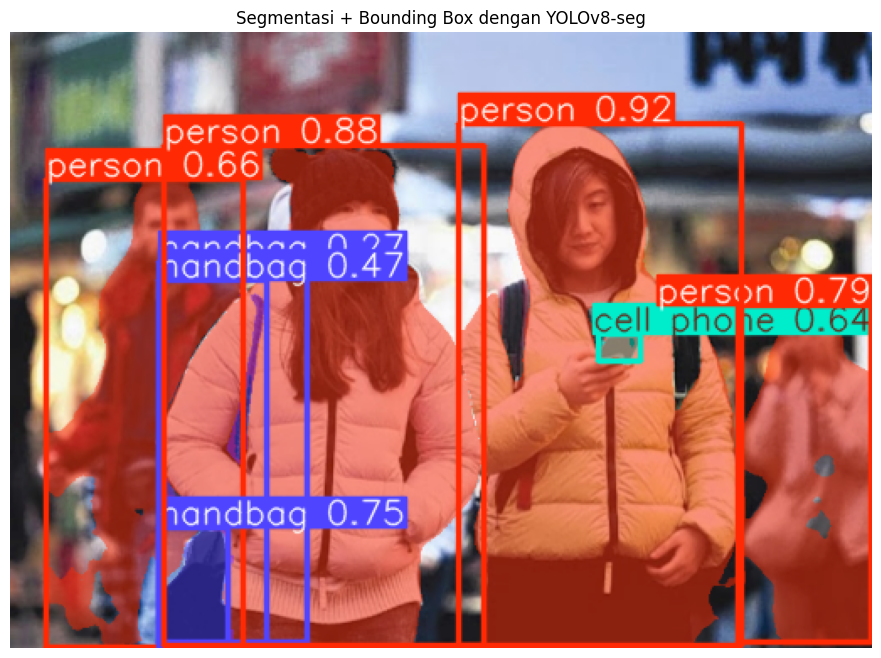

In [35]:
# 5. Prediksi
results = model(img_rgb)

# 6. Tampilkan hasil segmentasi dan bounding box
res_plotted = results[0].plot()
plt.figure(figsize=(12, 8))
plt.imshow(res_plotted)
plt.axis('off')
plt.title("Segmentasi + Bounding Box dengan YOLOv8-seg")
plt.show()

Bagian ini memungkinkan pengguna untuk mengunggah gambar baru secara manual melalui Google Colab. Setelah gambar diunggah, program akan membaca setiap gambar, melakukan segmentasi menggunakan model YOLOv8, lalu menampilkan hasil prediksi berupa segmentasi dan bounding box dalam bentuk visual.

Saving 20200221_133527_2_1200_30.jpg to 20200221_133527_2_1200_30.jpg

0: 448x640 1 fork, 1 bowl, 973.7ms
Speed: 7.8ms preprocess, 973.7ms inference, 13.9ms postprocess per image at shape (1, 3, 448, 640)


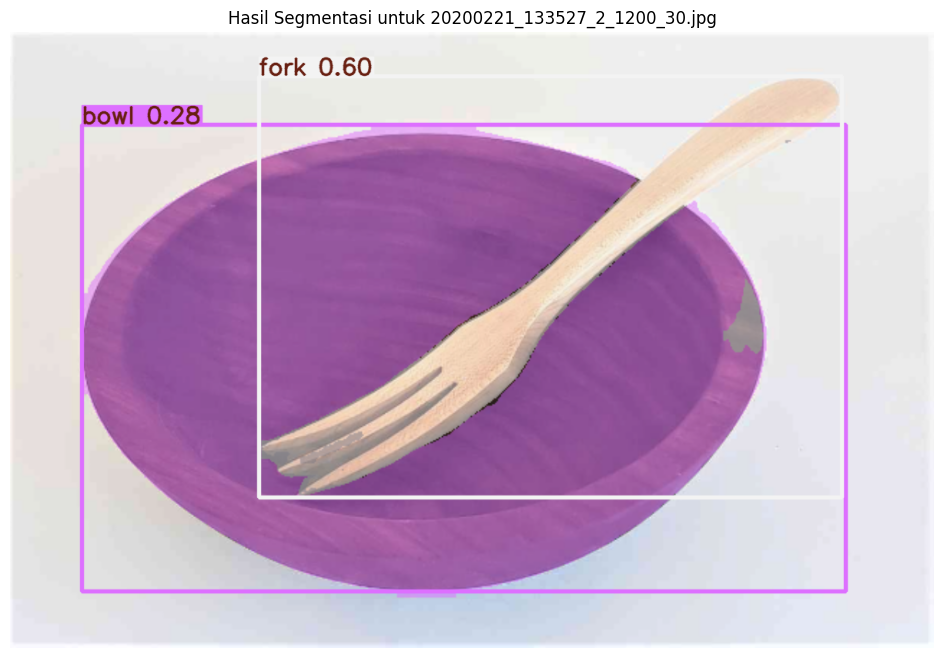

In [39]:
# 7. Upload gambar lain untuk segmentasi
from google.colab import files
uploaded = files.upload()

# 8. Deteksi dan tampilkan hasil untuk setiap gambar yang diupload
for fname in uploaded.keys():
    img_new = cv2.imread(fname)
    img_rgb_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)

    results_new = model(img_rgb_new)

    res_plot_new = results_new[0].plot()
    plt.figure(figsize=(12, 8))
    plt.imshow(res_plot_new)
    plt.axis('off')
    plt.title(f"Hasil Segmentasi untuk {fname}")
    plt.show()

In [38]:
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw